In [1]:
import tensorflow as tf


mnist = tf.keras.datasets.mnist #28 x 28 images of hand-written digits 0-9
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 32s 529us/step - loss: 0.2623 - acc: 0.9219
Epoch 2/5
60000/60000 [==============================] - 32s 530us/step - loss: 0.1077 - acc: 0.9676
Epoch 3/5
60000/60000 [==============================] - 27s 453us/step - loss: 0.0728 - acc: 0.9768
Epoch 4/5
60000/60000 [==============================] - 29s 476us/step - loss: 0.0526 - acc: 0.9834
Epoch 5/5
60000/60000 [==============================] - 31s 509us/step - loss: 0.0416 - acc: 0.9862


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 3s 278us/step
0.0830230213263887 0.9759


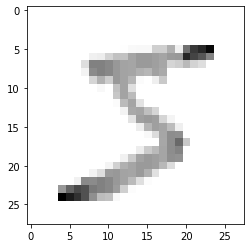

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
# print(x_train[0])

In [5]:
model.save('epic_num_reader.model')

In [6]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [7]:
predictions = new_model.predict([x_test])

In [8]:
print(predictions)

[[8.0261811e-11 2.5197210e-07 6.1722130e-07 ... 9.9999654e-01
  3.5339507e-09 7.3032465e-09]
 [4.2065865e-12 3.2637224e-06 9.9999678e-01 ... 5.0029803e-11
  4.4548740e-10 1.7708731e-15]
 [3.4613397e-09 9.9995911e-01 2.0352543e-06 ... 2.0120295e-05
  9.4622092e-06 1.9896356e-07]
 ...
 [3.8147239e-11 4.2978439e-08 7.4992040e-10 ... 4.3855002e-06
  3.9466414e-07 1.7223376e-05]
 [2.9123665e-10 1.9475917e-10 3.3428569e-09 ... 5.1346525e-08
  5.6138783e-06 1.4198329e-12]
 [1.9192019e-09 6.7701435e-12 4.9174903e-10 ... 8.6157307e-13
  4.5224713e-09 6.5047105e-13]]


In [34]:
import numpy as np

print(np.argmax(predictions[1]))

2


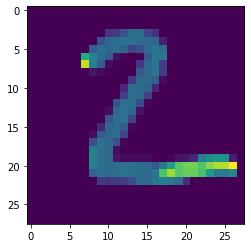

In [35]:
plt.imshow(x_test[1])
plt.show()